<a href="https://colab.research.google.com/github/romanozamoth/confusion-matrix-metrics-dio/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
tf.__version__

'2.18.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.8936 - loss: 0.3520 - val_accuracy: 0.9861 - val_loss: 0.0452
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 53ms/step - accuracy: 0.9830 - loss: 0.0526 - val_accuracy: 0.9901 - val_loss: 0.0335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 41ms/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9887 - val_loss: 0.0359
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.9921 - loss: 0.0236 - val_accuracy: 0.9896 - val_loss: 0.0353
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 108s 33ms/step - accuracy: 0.9945 - loss: 0.0185 - val_accuracy: 0.9887 - val_loss: 0.0336


In [12]:
y_true=test_labels
y_pred_proba = model.predict(test_images)
y_pred = np.argmax(y_pred_proba, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [13]:
classes=[0,1,2,3,4,5,6,7,8,9]

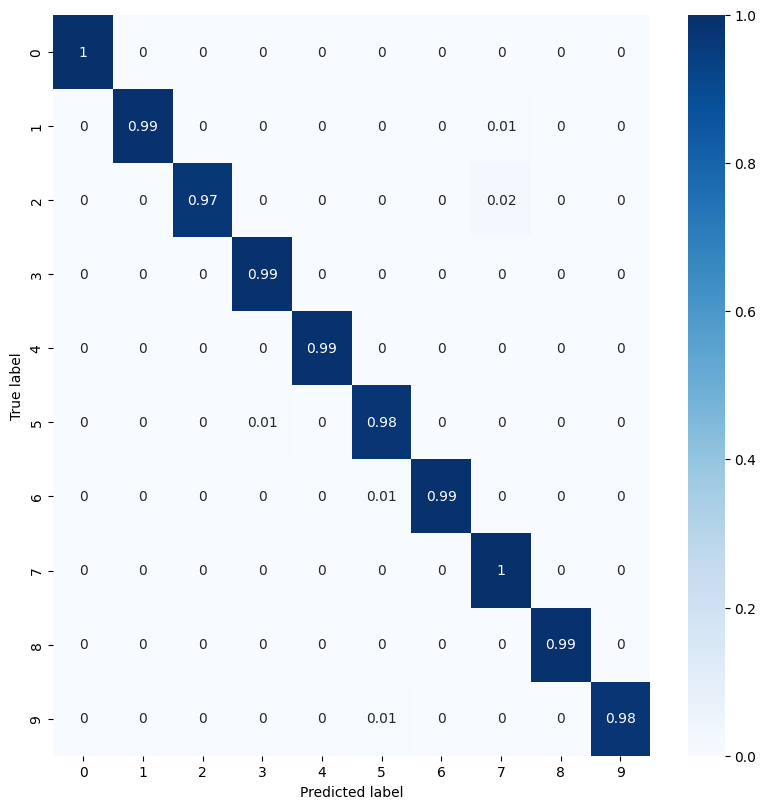

In [16]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
def calcular_metricas_por_classe(confusion_mat):
    num_classes = confusion_mat.shape[0]
    metricas = []

    for i in range(num_classes):
        VP = confusion_mat[i, i]
        FN = np.sum(confusion_mat[i, :]) - VP
        FP = np.sum(confusion_mat[:, i]) - VP
        VN = np.sum(confusion_mat) - (VP + FP + FN)

        sensibilidade = VP / (VP + FN) if (VP + FN) != 0 else 0
        especificidade = VN / (VN + FP) if (VN + FP) != 0 else 0
        acuracia = (VP + VN) / np.sum(confusion_mat)
        precisao = VP / (VP + FP) if (VP + FP) != 0 else 0
        f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) != 0 else 0

        metricas.append({
            'Classe': i,
            'VP': VP, 'FN': FN, 'FP': FP, 'VN': VN,
            'Sensibilidade': round(sensibilidade, 2),
            'Especificidade': round(especificidade, 2),
            'Acurácia': round(acuracia, 2),
            'Precisão': round(precisao, 2),
            'F-score': round(f_score, 2)
        })

    return pd.DataFrame(metricas)

df_metricas = calcular_metricas_por_classe(con_mat)
print(df_metricas)

   Classe    VP  FN  FP  ...  Especificidade  Acurácia  Precisão  F-score
0       0   977   3   5  ...             1.0       1.0      0.99     1.00
1       1  1125  10   8  ...             1.0       1.0      0.99     0.99
2       2  1005  27   3  ...             1.0       1.0      1.00     0.99
3       3  1003   7  17  ...             1.0       1.0      0.98     0.99
4       4   974   8   6  ...             1.0       1.0      0.99     0.99
5       5   878  14  16  ...             1.0       1.0      0.98     0.98
6       6   946  12   5  ...             1.0       1.0      0.99     0.99
7       7  1026   2  42  ...             1.0       1.0      0.96     0.98
8       8   961  13   2  ...             1.0       1.0      1.00     0.99
9       9   992  17   9  ...             1.0       1.0      0.99     0.99

[10 rows x 10 columns]
